# Kmeans + CAH

### 4DS1

Face aux problèmes d’économie et de financement après «la révolution», le ministère de
Transport et le ministère de Commerce ont décidé de chercher de nouveaux canaux d’importation
d’automobiles.  
Le profil souhaité doit nécessairement satisfaire les contraintes logistiques et techniques : le plus semblable aux modèles européens  
 Etant donné que plusieurs marchés internationaux se présentent volontaires pour accomplir cette
affaire.  
Une étude préliminaire sur ces marchés, mets à votre disposition un fichier contenant toutes les
caractéristiques des modèles de véhicules disponible dans toutes les offres, en précisant pour
chaque cas l’origine : Européen, Japonais ou Américain.  
Votre équipe est invité à préparer un rapport décisif sous forme de présentation de l’origine le
plus adapté au marché tunisien, et qui pourra remplacer le profil européen.

In [ ]:
#importation des données /chargement du fichier
import pandas
Voiture = pandas.read_table("Voitures_Origine.txt",sep="\t",header=0,index_col=0)

In [ ]:
# vérifions le type de Voiture
print(type(Voiture))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
#dimensions : nombre de lignes, nombre de colonnes
print(Voiture.shape)


(392, 6)


In [ ]:
#Les noms des colonnes
print(Voiture.columns)

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'origin'],
      dtype='object')


In [ ]:
#Type de chaque colonne
print(Voiture.dtypes)

mpg              int64
displacement     int64
horsepower       int64
weight           int64
acceleration     int64
origin          object
dtype: object


In [ ]:
#Description des données
print(Voiture.describe())

              mpg  displacement  horsepower       weight  acceleration
count  392.000000    392.000000  392.000000   392.000000    392.000000
mean    23.492347    194.410714  104.469388  2977.584184     15.681122
std      7.799924    104.645191   38.491160   849.402560      2.761232
min      9.000000     68.000000   46.000000  1613.000000      8.000000
25%     17.000000    105.000000   75.000000  2225.250000     14.000000
50%     23.000000    151.000000   93.500000  2803.500000     16.000000
75%     29.000000    275.750000  126.000000  3614.750000     17.000000
max     47.000000    455.000000  230.000000  5140.000000     25.000000


In [ ]:
#statistique descriptive. Pour plus de détails, voir :
#http://pandas.pydata.org/pandas-docs/stable/basics.html#summarizing-data-describe

In [ ]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix
scatter_matrix(Voiture,figsize=(9,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BA63993F88>,
      dtype=object)

**Méthode des centres mobiles : Kmeans avec le package « scikit-learn»**

In [ ]:
# valeurs de toutes les colonnes
#colonnes => 0:5 (0 à 5 [non inclus])
#lignes = : (toutes les colonnes)
V_SansLabels=Voiture.iloc[:,0:5];
#Labels
V_Labels=Voiture.iloc[:,5];

In [ ]:
#k-means
import numpy as np
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=2, init='random');
kmeans.fit(V_SansLabels);
#Profiling
print(kmeans.cluster_centers_) #[ mpg  displacement  horsepower  weight  acceleration ]
#index triés des groupes
idk = np.argsort(kmeans.labels_);
#affichage des observations et leurs groupes
print(pandas.DataFrame(V_SansLabels.index[idk],kmeans.labels_[idk]));
kmeans.labels_
#distances aux centres de classes des observations
print(kmeans.transform(V_SansLabels));
#correspondance avec les groupes réels
pandas.crosstab(V_Labels,kmeans.labels_)

[[  28.10169492  123.52118644   82.59322034 2381.38135593   16.34745763]
 [  16.51923077  301.65384615  137.56410256 3879.53205128   14.67307692]]
    Numero
0        1
0      151
0      152
0      153
0      154
..     ...
1      289
1      290
1      291
1      284
1      392

[392 rows x 1 columns]
[[ 770.25932902 2279.24594372]
 [ 734.56482681 2243.5973821 ]
 [ 628.53779875 2137.76809269]
 [ 623.28244139 2132.47830606]
 [ 610.91022812 2120.41798798]
 [ 588.05034234 2096.92219392]
 [ 588.0483824  2096.92084579]
 [ 582.23606958 2090.79645483]
 [ 582.78200568 2091.70410104]
 [ 557.15392242 2065.81819208]
 [ 558.76345171 2068.18890675]
 [ 548.49651364 2057.238277  ]
 [ 548.27099731 2056.81997396]
 [ 548.22045088 2057.85560099]
 [ 537.89048256 2047.05498158]
 [ 532.87708225 2041.85364067]
 [ 518.47221135 2028.0303556 ]
 [ 508.22683783 2017.56639268]
 [ 467.15898652 1975.99459738]
 [ 457.85452324 1967.25394517]
 [ 445.82885298 1955.23636715]
 [ 445.82885298 1955.23636715]
 [ 442.20424575

col_0,0,1
origin,,
american,99,146
european,58,10
japanese,79,0


K-MEANS, à la différence de la CAH, ne fournit pas d’outils d’aide à la détection du nombre de classes. Nous devons les programmer sous Python ou utiliser des procédures proposées par des packages dédiés. Le schéma est souvent le même : on fait varier le nombre de groupes et on surveille l’évolution d’un indicateur de qualité de la solution c.-à-d. l’aptitude des individus à être plus proches de ses congénères du même groupe que des individus des autres groupes. Dans ce qui suit, on calcule la métrique «silhouette » pour différents nombres de groupes issus de la méthode des centres mobiles.

[0.63670095 0.58526049 0.57873747 0.55506504 0.52665709 0.51728108
 0.52227783 0.50868581 0.50868634]


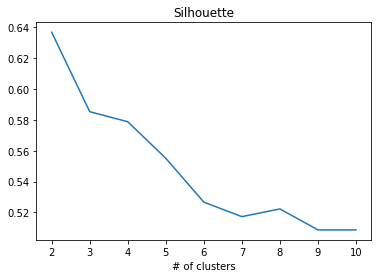

In [ ]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
  km = cluster.KMeans(n_clusters=k+2)
  km.fit(V_SansLabels)
  res[k] = metrics.silhouette_score(V_SansLabels,km.labels_)
print(res)
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

Classification Hiérarchique Ascendante (CAH)

In [ ]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [ ]:
#générer la matrice des distances
Z = linkage(V_SansLabels,method='ward',metric='euclidean')

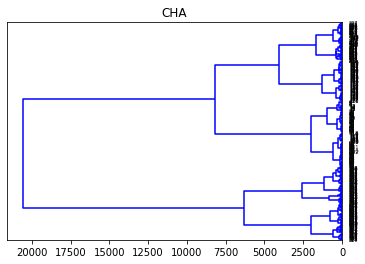

In [ ]:
#affichage du dendrogramme
plt.title("CHA")
dendrogram(Z,labels=V_SansLabels.index,orientation='left',color_threshold=0)
plt.show()

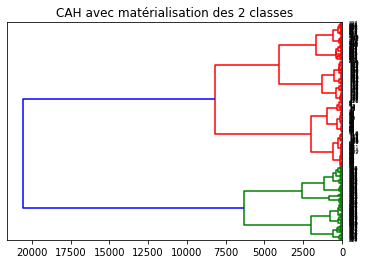

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
    Numero
1      392
1      295
1      296
1      297
1      298
..     ...
2      126
2      125
2      124
2      146
2      196

[392 rows x 1 columns]


In [ ]:
# matérialisation des deux classes (hauteur t = 17500)
plt.title('CAH avec matérialisation des 2 classes')
dendrogram(Z,labels=V_SansLabels.index,orientation='left',color_threshold=17500)
plt.show()

#découpage à la hauteur t = 17500==> identifiants de 2 groupes obtenus
groupes_cah = fcluster(Z,t=17500,criterion='distance')
print(groupes_cah)

#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pandas.DataFrame(V_SansLabels.index[idg],groupes_cah[idg]))

In [ ]:
#correspondance les vrais labels avec les groupes de la CAH
pandas.crosstab(V_Labels,groupes_cah)

col_0,1,2
origin,,
american,129,116
european,3,65
japanese,0,79
